In [1]:
from utils.infer import *
import pandas as pd
from  utils.eval import *
from utils.chat import *
from utils.data import *

%reload_ext autoreload
%autoreload 2

/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Combining inferences

In [8]:
inference_paths = "../data/inference"
output_path = "../data/combined_inferences.jsonl"

combined = combine(inference_paths, output_path)

### Building evaluation inputs

In [9]:
all_models = MODELS_TO_MODE.keys()

In [10]:
build_evaluation_inputs(output_path, models = all_models)

###  [OLD] Evaluation GPT 3 direct

In [ ]:
gpt_3_eval_res = note_evaluation('direct-gpt')

In [4]:
display(gpt_3_eval_res.sort_values(by='aggregated_score', ascending=False))

,idx,gold,pred,model_name,bleu,bert,gpt_score,rouge1,rouge2,rougeL,rougeLsum,aggregated_score
767,56341,A 46-year-old woman presented with intermitten...,Patient presented with a two-month history of ...,direct-gpt,0.384352,0.947115,8,0.938389,0.852381,0.928910,0.928910,1.406937
307,125854,"A healthy, athletic 19-year-old African Americ...",Patient presented for a surgical evaluation of...,direct-gpt,0.256832,0.885681,9,0.904645,0.796069,0.860636,0.860636,1.183339
213,165122,"A 19-year-old, single, unemployed, Caucasian f...",Patient presented with multiple pigmented annu...,direct-gpt,0.309861,0.901271,9,0.864450,0.771208,0.843990,0.843990,1.166625
534,146809,"The present case is about a 48-year-old, femal...",Patient presented with complaints of fullness ...,direct-gpt,0.598819,0.882541,9,0.806604,0.658768,0.764151,0.764151,1.086166
417,117607,The author reports a case of 30-year-old male ...,Patient presents to the physiotherapy outpatie...,direct-gpt,0.140051,0.879066,9,0.840295,0.735802,0.830467,0.830467,1.056809
...,...,...,...,...,...,...,...,...,...,...,...,...
518,170283,A 70-year-old nonverbal female presented to th...,Patient presented to the emergency department ...,direct-gpt,0.182045,0.809504,8,0.340580,0.167883,0.231884,0.231884,0.229316
341,163372,A 23-year-old male patient presented to us in ...,Patient presented with a deformity of the back...,direct-gpt,0.050793,0.915659,2,0.395480,0.187500,0.305085,0.305085,0.221921
270,162274,"A 26-year-old man, educated in an engineering ...",Patient presented with a chief complaint of co...,direct-gpt,0.165997,0.851599,7,0.347561,0.085890,0.250000,0.250000,0.218151
755,15191,A 55-year-old male who had been diagnosed with...,Patient presented with a two-week history of i...,direct-gpt,0.237331,0.890861,2,0.385852,0.213592,0.327974,0.327974,0.214040


### Evaluation meditron-7b-summarizer

In [45]:
summarizer7_eval_by_sample , summarizer7_eval_by_key = summary_evaluation('meditron-7b-summarizer')

Running summary evaluation with score types: ['bleu', 'rouge', 'bert', 'gpt_similarity_score']
Loading data...
Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'flatten and match dicts': 'done', 'clean dicts and counts': 'done', 'summary_statistics': 'done', 'scores': 'done', 'pairs_idx': 'done', 'eval_by_sample': 'in progress', 'eval_by_key': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}


### Evaluation meditron-13b-summarizer

In [46]:
summarizer13_eval_by_sample , summarizer13_eval_by_key = summary_evaluation('meditron-13b-summarizer')

Running summary evaluation with score types: ['bleu', 'rouge', 'bert', 'gpt_similarity_score']
Loading data...
Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'flatten and match dicts': 'done', 'clean dicts and counts': 'done', 'summary_statistics': 'done', 'scores': 'done', 'pairs_idx': 'done', 'eval_by_sample': 'in progress', 'eval_by_key': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}


### Merging summaries eval (and computing aggragated scores)

In [91]:
final_summary_eval = merge_summary_evaluation(summarizer_models)
display(final_summary_eval)

,model,mean_bleu,mean_bert,mean_gpt_similarity_score,mean_rouge1,mean_rouge2,mean_rougeL,mean_rougeLsum,aggregated_score,missing_keys_count_prop,extra_keys_count_prop,common_none_count_prop,gold_none_count_prop,pred_none_count_prop,common_non_none_prop,mean_number_of_keys
0,meditron-7b-summarizer,0.208256,0.903149,7.356083,0.648584,0.461197,0.639717,0.639717,0.547134,0.164558,0.009932,0.429649,0.027024,0.051360,0.317477,80.201
1,meditron-13b-summarizer,0.203400,0.902464,7.318198,0.644532,0.457226,0.635784,0.635784,0.543132,0.164570,0.009319,0.428958,0.027312,0.054123,0.315718,80.188


In [92]:
evaluation_path = 'evaluation'
eval_by_sample_path = '_eval_res/summary_eval_by_sample.jsonl'
eval_by_key_path = '_eval_res/summary_eval_by_key.jsonl'

summarizer7_eval_by_sample = load_file(f"{evaluation_path}/meditron-7b-summarizer{eval_by_sample_path}")
summarizer7_eval_by_key = load_file(f"{evaluation_path}/meditron-7b-summarizer{eval_by_key_path}")
summarizer13_eval_by_sample = load_file(f"{evaluation_path}/meditron-13b-summarizer{eval_by_sample_path}")
summarizer13_eval_by_key = load_file(f"{evaluation_path}/meditron-13b-summarizer{eval_by_key_path}")

display(summarizer7_eval_by_sample.sort_values(by='aggregated_score', ascending=False))
display(summarizer7_eval_by_key)
display(summarizer13_eval_by_sample.sort_values(by='aggregated_score', ascending=False))
display(summarizer13_eval_by_key)


,idx,gold,pred,conversation,mean_bleu,mean_bert,mean_gpt_similarity_score,mean_rouge1,mean_rouge2,mean_rougeL,mean_rougeLsum,missing_keys_count,extra_keys_count,common_none_count,gold_none_count,pred_none_count,common_non_none,all_keys_count,aggregated_score
506,171553,{'visit motivation': 'Episodes of continuous a...,{'visit motivation': 'Episodes of continuous a...,"Doctor: Good morning, Mr. Smith. I see that yo...",0.485441,0.998456,5.500000,0.993852,0.826977,0.993852,0.993852,34,6,19,0,0,24,83,0.860968
884,196044,{'visit motivation': 'Inability to flex left e...,{'visit motivation': 'Inability to flex left e...,"Doctor: Good morning, how are you feeling toda...",0.612640,0.967639,9.480000,0.911776,0.811710,0.901959,0.901959,0,0,34,0,5,25,64,0.844289
444,199095,{'visit motivation': 'Complaining of back pain...,{'visit motivation': 'Complaining of back pain...,"Doctor: Hello, how are you feeling today?\nPat...",0.461334,0.989777,7.153846,0.945359,0.830744,0.939692,0.939692,0,0,33,2,2,39,76,0.837637
598,197444,"{'visit motivation': 'appetite loss', 'admissi...","{'visit motivation': 'appetite loss', 'admissi...","Doctor: Good morning, you were admitted to our...",0.574944,0.979784,7.562500,0.919436,0.771693,0.915963,0.915963,3,0,31,2,6,16,58,0.827107
729,196330,{'visit motivation': 'Sudden increase in the i...,{'visit motivation': 'Sudden increase in the i...,"Doctor: Hello, how are you feeling today?\nPat...",0.467932,0.983886,9.366667,0.928611,0.759967,0.928611,0.928611,11,0,36,2,3,30,82,0.823643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,121545,{'visit motivation': 'Complaints of vomiting a...,{},"Doctor: Hi, what brings you here today?\nPatie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,0,0,0,0,0,96,0.000000
581,37048,"{'visit motivation': 'Pain, hemorrhage and a g...",{},"Doctor: Hello, I'm Dr. Smith. How are you feel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,0,0,0,0,0,67,0.000000
587,2397,{'visit motivation': 'Pain on the lower right ...,{},"Doctor: Hello, what brings you here today?\nPa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,0,0,0,0,0,61,0.000000
617,123492,{'visit motivation': 'Dizziness and near synco...,{},"Doctor: Good morning, what brings you to the e...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,0,0,0,0,83,0.000000


,keys,bleu,bert,gpt_similarity_score,rouge1,rouge2,rougeL,rougeLsum,gold_none_prop,pred_none_prop,missing_keys_prop,aggregated_score
0,admission/0/care center details,0.270086,0.918273,7.611111,0.735385,0.650588,0.726991,0.726991,0.048,0.153,0.012,0.510118
1,admission/0/date,0.231097,0.919139,7.827957,0.761162,0.608599,0.754994,0.754994,0.020,0.095,0.012,0.565423
2,admission/0/duration,0.116882,0.927714,8.325843,0.762572,0.690028,0.762572,0.762572,0.021,0.049,0.012,0.602280
3,admission/0/reason,0.262550,0.884549,7.142216,0.552512,0.429219,0.531419,0.531419,0.038,0.069,0.012,0.429594
4,admission/1/care center details,0.082227,0.941237,8.200000,0.795455,0.666667,0.795455,0.795455,0.001,0.003,0.010,0.653332
...,...,...,...,...,...,...,...,...,...,...,...,...
223,treatments/5/reaction to treatment,0.000000,0.926654,8.000000,0.533333,0.461538,0.533333,0.533333,0.000,0.000,0.016,0.451646
224,treatments/5/reason for taking,0.333333,0.809110,4.666667,0.416667,0.333333,0.416667,0.416667,0.000,0.000,0.016,0.389713
225,treatments/5/related condition,0.000000,0.833170,5.500000,0.500000,0.000000,0.500000,0.500000,0.000,0.000,0.016,0.308948
226,treatments/5/time,0.000000,0.659807,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.016,0.020751


,idx,gold,pred,conversation,mean_bleu,mean_bert,mean_gpt_similarity_score,mean_rouge1,mean_rouge2,mean_rougeL,mean_rougeLsum,missing_keys_count,extra_keys_count,common_none_count,gold_none_count,pred_none_count,common_non_none,all_keys_count,aggregated_score
506,171553,{'visit motivation': 'Episodes of continuous a...,{'visit motivation': 'Episodes of continuous a...,"Doctor: Good morning, Mr. Smith. I see that yo...",0.418091,0.980467,9.333333,0.906004,0.767392,0.903359,0.903359,25,6,24,1,0,27,83,0.805180
494,187015,{'visit motivation': 'Elective left and right ...,{'visit motivation': 'Elective left and right ...,"Doctor: Good morning, Mr. Johnson. How are you...",0.463583,0.969643,9.520000,0.899577,0.700834,0.899577,0.899577,9,0,37,2,0,25,73,0.792847
444,199095,{'visit motivation': 'Complaining of back pain...,{'visit motivation': 'Complaining of back pain...,"Doctor: Hello, how are you feeling today?\nPat...",0.409682,0.979850,9.040000,0.908114,0.720753,0.899486,0.899486,12,0,30,2,7,25,76,0.789941
676,183398,{'visit motivation': 'Complaining of atraumati...,{'visit motivation': 'Complaining of atraumati...,"Doctor: Hi there, how are you feeling today?\n...",0.264289,0.982445,9.291667,0.931441,0.735302,0.925330,0.925330,0,0,38,2,0,24,64,0.787908
97,193172,{'visit motivation': 'Routine follow-up examin...,{'visit motivation': 'Routine follow-up examin...,"Doctor: Good morning, Mr. Johnson. How are you...",0.400595,0.964266,8.720000,0.871995,0.739095,0.856995,0.856995,6,0,39,1,2,25,73,0.769641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,62901,{'visit motivation': 'Incidentally detected mi...,{},"Doctor: Hi, I understand that you were referre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,0,0,0,0,0,61,0.000000
587,2397,{'visit motivation': 'Pain on the lower right ...,{},"Doctor: Hello, what brings you here today?\nPa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,0,0,0,0,0,61,0.000000
290,154957,{'visit motivation': 'Jaundice and dark urine'...,{},"Doctor: Hello, how are you feeling today?\nPat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,0,0,0,0,0,103,0.000000
133,132207,{'visit motivation': 'Pain and swelling on rig...,{},"Doctor: Good morning, what brings you to the d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,0,0,0,0,0,79,0.000000


,keys,bleu,bert,gpt_similarity_score,rouge1,rouge2,rougeL,rougeLsum,gold_none_prop,pred_none_prop,missing_keys_prop,aggregated_score
0,admission/0/care center details,0.264811,0.920767,7.886364,0.733560,0.643519,0.728607,0.728607,0.050,0.167,0.014,0.497743
1,admission/0/date,0.222130,0.915933,7.511111,0.744379,0.559630,0.735311,0.735311,0.019,0.097,0.014,0.541864
2,admission/0/duration,0.121161,0.941716,8.843373,0.808594,0.726863,0.806249,0.806249,0.019,0.054,0.014,0.632024
3,admission/0/reason,0.255464,0.885055,6.565868,0.553590,0.427894,0.533150,0.533150,0.050,0.067,0.014,0.420972
4,admission/1/care center details,0.160790,0.945127,8.600000,0.815455,0.777778,0.815455,0.815455,0.001,0.003,0.009,0.704808
...,...,...,...,...,...,...,...,...,...,...,...,...
221,treatments/4/time,0.000000,0.815932,3.000000,0.272727,0.200000,0.272727,0.272727,0.000,0.000,0.026,0.223650
222,treatments/5/name,0.000000,0.933010,5.500000,0.750000,0.500000,0.750000,0.750000,0.000,0.000,0.017,0.563029
223,treatments/5/reason for taking,0.762368,0.993797,9.500000,0.900000,0.807692,0.900000,0.900000,0.000,0.000,0.017,0.847117
224,treatments/5/related condition,0.000000,0.950773,9.000000,0.857143,0.400000,0.571429,0.571429,0.000,0.000,0.017,0.511188


### Evaluation meditron-7b-direct-trunc

In [172]:
meditron_7b_direct_trunc_eval_res = note_evaluation('meditron-7b-direct-trunc')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'done', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done', 'gpt_clarity_score': 'done', 'gpt_coherence_score': 'done', 'gpt_factuality_score': 'done'}


### Evaluation meditron-13b-direct-trunc

In [187]:
meditron_13b_direct_trunc_eval_res = note_evaluation('meditron-13b-direct-trunc')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done', 'gpt_clarity_score': 'done', 'gpt_coherence_score': 'tbd', 'gpt_factuality_score': 'tbd'}
Removing stopwords...


100%|██████████| 1000/1000 [00:04<00:00, 200.51it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...
GPT-4 clarity scores already computed.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 103.51it/s]


Total input tokens: 869117, total input cost: 8.69117$
Sub_batch 1/2: 85 calls, 496747 total tokens: 4.9674700000000005$
....................20
....................40
....................60
....................80
.....

Break for 5 seconds.
End of break.
Sub_batch 2/2: 40 calls, 372370 total tokens: 3.7237$
....................20
....................40


Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 61.80it/s]


Total input tokens: 1529022, total input cost: 15.29022$
Sub_batch 1/4: 48 calls, 492530 total tokens: 4.9253$
....................20
....................40
........

Break for 5 seconds.
End of break.
Sub_batch 2/4: 39 calls, 486929 total tokens: 4.8692899999999995$
....................20
...................

Break for 5 seconds.
End of break.
Sub_batch 3/4: 34 calls, 487712 total tokens: 4.87712$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 4/4: 4 calls, 61851 total tokens: 0.61851$
....

Break for 5 seconds.
End of break.


### Evaluation meditron-7b-generator

In [188]:
meditron_7b_generator_eval_res = note_evaluation('meditron-7b-generator')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:04<00:00, 206.34it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 96.10it/s]


Total input tokens: 868923, total input cost: 8.68923$
Sub_batch 1/2: 85 calls, 497194 total tokens: 4.97194$
....................20
....................40
....................60
....................80
.....

Break for 5 seconds.
End of break.
Sub_batch 2/2: 40 calls, 371729 total tokens: 3.7172899999999998$
....................20
....................40


Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 102.13it/s]


Total input tokens: 867298, total input cost: 8.67298$
Sub_batch 1/2: 85 calls, 496089 total tokens: 4.96089$
....................20
....................40
....................60
....................80
.....

Break for 5 seconds.
End of break.
Sub_batch 2/2: 40 calls, 371209 total tokens: 3.71209$
....................20
....................40


Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 61.53it/s]


Total input tokens: 1527203, total input cost: 15.27203$
Sub_batch 1/4: 49 calls, 493124 total tokens: 4.931240000000001$
....................20
....................40
.........

Break for 5 seconds.
End of break.
Sub_batch 2/4: 39 calls, 490780 total tokens: 4.9078$
....................20
...................

Break for 5 seconds.
End of break.
Sub_batch 3/4: 34 calls, 496890 total tokens: 4.9689$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 4/4: 3 calls, 46409 total tokens: 0.46409$
...

Break for 5 seconds.
End of break.


### Evaluation meditron-13b-generator

In [193]:
meditron_13b_generator_eval_res = note_evaluation('meditron-13b-generator')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'done', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done', 'gpt_clarity_score': 'done', 'gpt_coherence_score': 'done', 'gpt_factuality_score': 'done'}


### Evaluation gpt3-direct

In [194]:
gpt3_direct_eval_res = note_evaluation('gpt3-direct')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:05<00:00, 173.78it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 111.54it/s]


Total input tokens: 778458, total input cost: 7.78458$
Sub_batch 1/2: 93 calls, 497959 total tokens: 4.97959$
....................20
....................40
....................60
....................80
.............

Break for 5 seconds.
End of break.
Sub_batch 2/2: 32 calls, 280499 total tokens: 2.80499$
....................20
............

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 77.85it/s]


Total input tokens: 776833, total input cost: 7.76833$
Sub_batch 1/2: 93 calls, 496750 total tokens: 4.9675$
....................20
....................40
....................60
....................80
.............

Break for 5 seconds.
End of break.
Sub_batch 2/2: 32 calls, 280083 total tokens: 2.8008300000000004$
....................20
............

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 65.67it/s]


Total input tokens: 1436738, total input cost: 14.36738$
Sub_batch 1/3: 52 calls, 490436 total tokens: 4.90436$
....................20
....................40
............

Break for 5 seconds.
End of break.
Sub_batch 2/3: 41 calls, 493053 total tokens: 4.93053$
....................20
....................40
.

Break for 5 seconds.
End of break.
Sub_batch 3/3: 32 calls, 453249 total tokens: 4.53249$
....................20
............

Break for 5 seconds.
End of break.


### Evaluation mistral-7b-direct

In [195]:
mistral_7_b_eval_res = note_evaluation('mistral-7b-direct')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:06<00:00, 158.56it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 95.54it/s]


Total input tokens: 778041, total input cost: 7.780410000000001$
Sub_batch 1/2: 93 calls, 495414 total tokens: 4.95414$
....................20
....................40
....................60
....................80
.............

Break for 5 seconds.
End of break.
Sub_batch 2/2: 32 calls, 282627 total tokens: 2.82627$
....................20
............

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:00<00:00, 127.46it/s]


Total input tokens: 776416, total input cost: 7.76416$
Sub_batch 1/2: 93 calls, 494205 total tokens: 4.94205$
....................20
....................40
....................60
....................80
.............

Break for 5 seconds.
End of break.
Sub_batch 2/2: 32 calls, 282211 total tokens: 2.8221100000000003$
....................20
............

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 70.27it/s]


Total input tokens: 1436321, total input cost: 14.363209999999999$
Sub_batch 1/3: 52 calls, 488405 total tokens: 4.88405$
....................20
....................40
............

Break for 5 seconds.
End of break.
Sub_batch 2/3: 41 calls, 496115 total tokens: 4.96115$
....................20
....................40
.

Break for 5 seconds.
End of break.
Sub_batch 3/3: 32 calls, 451801 total tokens: 4.51801$
....................20
............

Break for 5 seconds.
End of break.


### Evaluation gpt3-generator-gpt

In [200]:
gpt3_generator_gpt_eval_res = note_evaluation('gpt3-generator-gpt')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done', 'gpt_clarity_score': 'in progress', 'gpt_coherence_score': 'tbd', 'gpt_factuality_score': 'tbd'}
Removing stopwords...


100%|██████████| 1000/1000 [00:06<00:00, 150.16it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...
GPT-4 clarity score computation already in progress, resuming


Building sub-batches: 100%|██████████| 40/40 [00:00<00:00, 94.97it/s] 


Total input tokens: 182538, total input cost: 1.8253800000000002$
Sub_batch 1/1: 40 calls, 182538 total tokens: 1.8253800000000002$
....................20
....................40


Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 107.83it/s]


Total input tokens: 861110, total input cost: 8.6111$
Sub_batch 1/2: 86 calls, 499534 total tokens: 4.99534$
....................20
....................40
....................60
....................80
......

Break for 5 seconds.
End of break.
Sub_batch 2/2: 39 calls, 361576 total tokens: 3.6157600000000003$
....................20
...................

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 51.75it/s]


Total input tokens: 1521015, total input cost: 15.21015$
Sub_batch 1/4: 49 calls, 498818 total tokens: 4.98818$
....................20
....................40
.........

Break for 5 seconds.
End of break.
Sub_batch 2/4: 40 calls, 496067 total tokens: 4.96067$
....................20
....................40


Break for 5 seconds.
End of break.
Sub_batch 3/4: 34 calls, 495254 total tokens: 4.95254$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 4/4: 2 calls, 30876 total tokens: 0.30876000000000003$
..

Break for 5 seconds.
End of break.


### Evaluation gpt3-generator-7b

In [201]:
gpt3_generator_7b = note_evaluation('gpt3-generator-7b')

[autoreload of utils.eval failed: Traceback (most recent call last):
  File "/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/paul/Desktop/Make-Project/ClinicalNotes/utils/eval.py", line 64, in <module>
    ELO_MODELS = MODELS_TO_MODE.keys().copy()
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'dict_k

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:04<00:00, 211.05it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 84.97it/s]


Total input tokens: 857331, total input cost: 8.573310000000001$
Sub_batch 1/2: 86 calls, 496962 total tokens: 4.96962$
....................20
....................40
....................60
....................80
......

Break for 5 seconds.
End of break.
Sub_batch 2/2: 39 calls, 360369 total tokens: 3.6036900000000003$
....................20
...................

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 109.96it/s]


Total input tokens: 855706, total input cost: 8.55706$
Sub_batch 1/2: 86 calls, 495844 total tokens: 4.95844$
....................20
....................40
....................60
....................80
......

Break for 5 seconds.
End of break.
Sub_batch 2/2: 39 calls, 359862 total tokens: 3.5986200000000004$
....................20
...................

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 64.28it/s]


Total input tokens: 1515611, total input cost: 15.156110000000002$
Sub_batch 1/4: 49 calls, 490702 total tokens: 4.90702$
....................20
....................40
.........

Break for 5 seconds.
End of break.
Sub_batch 2/4: 39 calls, 489192 total tokens: 4.89192$
....................20
...................

Break for 5 seconds.
End of break.
Sub_batch 3/4: 34 calls, 488411 total tokens: 4.88411$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 4/4: 3 calls, 47306 total tokens: 0.47306$
...

Break for 5 seconds.
End of break.


### Evaluation gpt3-generator-13b

In [202]:
gpt3_generator_13b_eval_res = note_evaluation('gpt3-generator-13b')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:04<00:00, 230.35it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 109.88it/s]


Total input tokens: 856862, total input cost: 8.56862$
Sub_batch 1/2: 86 calls, 497552 total tokens: 4.97552$
....................20
....................40
....................60
....................80
......

Break for 5 seconds.
End of break.
Sub_batch 2/2: 39 calls, 359310 total tokens: 3.5931$
....................20
...................

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 99.48it/s]


Total input tokens: 855237, total input cost: 8.55237$
Sub_batch 1/2: 86 calls, 496434 total tokens: 4.96434$
....................20
....................40
....................60
....................80
......

Break for 5 seconds.
End of break.
Sub_batch 2/2: 39 calls, 358803 total tokens: 3.58803$
....................20
...................

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 52.16it/s]


Total input tokens: 1515142, total input cost: 15.151420000000002$
Sub_batch 1/4: 49 calls, 486296 total tokens: 4.86296$
....................20
....................40
.........

Break for 5 seconds.
End of break.
Sub_batch 2/4: 40 calls, 499574 total tokens: 4.9957400000000005$
....................20
....................40


Break for 5 seconds.
End of break.
Sub_batch 3/4: 34 calls, 499232 total tokens: 4.99232$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 4/4: 2 calls, 30040 total tokens: 0.3004$
..

Break for 5 seconds.
End of break.


### Evaluation  meditron-7b-generator-gold

In [203]:
meditron_7b_generator_gold_eval_res = note_evaluation('meditron-7b-generator-gold')


Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:04<00:00, 226.03it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 102.52it/s]


Total input tokens: 876173, total input cost: 8.76173$
Sub_batch 1/2: 84 calls, 494207 total tokens: 4.94207$
....................20
....................40
....................60
....................80
....

Break for 5 seconds.
End of break.
Sub_batch 2/2: 41 calls, 381966 total tokens: 3.8196600000000003$
....................20
....................40
.

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 65.73it/s]


Total input tokens: 874548, total input cost: 8.74548$
Sub_batch 1/2: 84 calls, 493115 total tokens: 4.931150000000001$
....................20
....................40
....................60
....................80
....

Break for 5 seconds.
End of break.
Sub_batch 2/2: 41 calls, 381433 total tokens: 3.81433$
....................20
....................40
.

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 65.96it/s]


Total input tokens: 1534453, total input cost: 15.34453$
Sub_batch 1/4: 49 calls, 493320 total tokens: 4.9332$
....................20
....................40
.........

Break for 5 seconds.
End of break.
Sub_batch 2/4: 40 calls, 497951 total tokens: 4.97951$
....................20
....................40


Break for 5 seconds.
End of break.
Sub_batch 3/4: 33 calls, 494577 total tokens: 4.94577$
....................20
.............

Break for 5 seconds.
End of break.
Sub_batch 4/4: 3 calls, 48605 total tokens: 0.48605$
...

Break for 5 seconds.
End of break.


### Evaluation meditron-13b-generator-gold

In [18]:
meditron_13b_generator_gold_eval_res = note_evaluation('meditron-13b-generator-gold')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'done'}
Removing stopwords...


100%|██████████| 1000/1000 [00:04<00:00, 232.38it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...
GPT-4 scores already computed.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 95.67it/s]


Total input tokens: 871662, total input cost: 8.71662$
Sub_batch 1/3: 72 calls, 396093 total tokens: 3.9609300000000003$
....................20
....................40
....................60
............

Break for 5 seconds.
End of break.
Sub_batch 2/3: 45 calls, 393591 total tokens: 3.9359100000000002$
....................20
....................40
.....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 8 calls, 81978 total tokens: 0.81978$
........

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 91.60it/s]


Total input tokens: 870037, total input cost: 8.700370000000001$
Sub_batch 1/3: 72 calls, 395157 total tokens: 3.95157$
....................20
....................40
....................60
............

Break for 5 seconds.
End of break.
Sub_batch 2/3: 45 calls, 393006 total tokens: 3.9300599999999997$
....................20
....................40
.....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 8 calls, 81874 total tokens: 0.81874$
........

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:03<00:00, 39.50it/s]


Total input tokens: 1529942, total input cost: 15.29942$
Sub_batch 1/4: 39 calls, 393587 total tokens: 3.93587$
....................20
...................

Break for 5 seconds.
End of break.
Sub_batch 2/4: 34 calls, 396787 total tokens: 3.96787$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 3/4: 29 calls, 390117 total tokens: 3.9011700000000005$
....................20
.........

Break for 5 seconds.
End of break.
Sub_batch 4/4: 23 calls, 349451 total tokens: 3.4945100000000004$
....................20
...

Break for 5 seconds.
End of break.


### Evaluation gpt4-direct

In [17]:
gpt4_direct_eval_res = note_evaluation('gpt4-direct')


Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'scores': 'in progress', 'bleu': 'done', 'rouge': 'done', 'bert': 'done', 'gpt_similarity_score': 'tbd', 'gpt_clarity_score': 'tbd', 'gpt_coherence_score': 'tbd', 'gpt_factuality_score': 'tbd'}
Removing stopwords...


100%|██████████| 1000/1000 [00:05<00:00, 198.76it/s]


Stopwords removed.
BLEU scores already computed.
ROUGE scores already computed.
Computing BERTscores...
BERTscores already computed.
GPT-4 similarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 75.34it/s]


Total input tokens: 915430, total input cost: 9.1543$
Sub_batch 1/3: 54 calls, 394930 total tokens: 3.9493$
....................20
....................40
..............

Break for 5 seconds.
End of break.
Sub_batch 2/3: 54 calls, 396375 total tokens: 3.96375$
....................20
....................40
..............

Break for 5 seconds.
End of break.
Sub_batch 3/3: 17 calls, 124125 total tokens: 1.24125$
.................

Break for 7 seconds.
End of break.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 88.85it/s]


Total input tokens: 912656, total input cost: 9.12656$
Sub_batch 1/3: 69 calls, 397673 total tokens: 3.9767300000000003$
....................20
....................40
....................60
.........

Break for 5 seconds.
End of break.
Sub_batch 2/3: 44 calls, 390190 total tokens: 3.9019$
....................20
....................40
....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 12 calls, 124793 total tokens: 1.24793$
............

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 76.69it/s]


Total input tokens: 911031, total input cost: 9.11031$
Sub_batch 1/3: 69 calls, 396776 total tokens: 3.96776$
....................20
....................40
....................60
.........

Break for 5 seconds.
End of break.
Sub_batch 2/3: 45 calls, 399950 total tokens: 3.9995$
....................20
....................40
.....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 11 calls, 114305 total tokens: 1.1430500000000001$
...........

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 50.65it/s]


Total input tokens: 1570936, total input cost: 15.70936$
Sub_batch 1/4: 39 calls, 397691 total tokens: 3.9769099999999997$
....................20
...................

Break for 5 seconds.
End of break.
Sub_batch 2/4: 33 calls, 399373 total tokens: 3.99373$
....................20
.............

Break for 5 seconds.
End of break.
Sub_batch 3/4: 29 calls, 398897 total tokens: 3.98897$
....................20
.........

Break for 5 seconds.
End of break.
Sub_batch 4/4: 24 calls, 374975 total tokens: 3.74975$
....................20
....

Break for 5 seconds.
End of break.


### Evaluation llama-2-7b-chat

In [22]:
llama_2_7b_chat_eval_res = note_evaluation('llama-2-7b-direct')

Creating Evaluation directory and progress monitoring
Removing stopwords...


100%|██████████| 1000/1000 [00:05<00:00, 196.22it/s]


Stopwords removed.


Computing Rouge scores: 100%|██████████| 10/10 [03:02<00:00, 18.26s/it]


Computing BERTscores...


Computing BERT scores: 100%|██████████| 10/10 [26:13<00:00, 157.33s/it]


GPT-4 similarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:04<00:00, 27.81it/s]


Total input tokens: 946116, total input cost: 9.46116$
Sub_batch 1/3: 52 calls, 394029 total tokens: 3.94029$
....................20
....................40
............

Break for 5 seconds.
End of break.
Sub_batch 2/3: 52 calls, 395181 total tokens: 3.95181$
....................20
....................40
............

Break for 5 seconds.
End of break.
Sub_batch 3/3: 21 calls, 156906 total tokens: 1.5690600000000001$
....................20
.

Break for 5 seconds.
End of break.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 72.29it/s]


Total input tokens: 943334, total input cost: 9.43334$
Sub_batch 1/3: 67 calls, 397648 total tokens: 3.9764800000000005$
....................20
....................40
....................60
.......

Break for 5 seconds.
End of break.
Sub_batch 2/3: 44 calls, 398733 total tokens: 3.98733$
....................20
....................40
....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 14 calls, 146953 total tokens: 1.46953$
..............

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 58.60it/s]


Total input tokens: 941709, total input cost: 9.41709$
Sub_batch 1/3: 67 calls, 396777 total tokens: 3.96777$
....................20
....................40
....................60
.......

Break for 5 seconds.
End of break.
Sub_batch 2/3: 44 calls, 398161 total tokens: 3.9816100000000003$
....................20
....................40
....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 14 calls, 146771 total tokens: 1.4677099999999998$
..............

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:08<00:00, 13.93it/s]


Total input tokens: 1570997, total input cost: 15.70997$
Sub_batch 1/4: 39 calls, 399183 total tokens: 3.99183$
....................20
...................

Break for 5 seconds.
End of break.
Sub_batch 2/4: 32 calls, 386883 total tokens: 3.86883$
....................20
............

Break for 5 seconds.
End of break.
Sub_batch 3/4: 28 calls, 388136 total tokens: 3.8813600000000004$
....................20
........

Break for 5 seconds.
End of break.
Sub_batch 4/4: 26 calls, 396795 total tokens: 3.96795$
....................20
......

Break for 5 seconds.
End of break.


### Evaluation llama-2-13b-chat

In [23]:
llama_2_13b_chat_eval_res = note_evaluation('llama-2-13b-direct')

[autoreload of utils.eval failed: Traceback (most recent call last):
  File "/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Users/paul/anaconda3/envs/ClinicalNotes/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/paul/Desktop/Make-Project/ClinicalNotes/

Creating Evaluation directory and progress monitoring
Removing stopwords...


100%|██████████| 1000/1000 [00:10<00:00, 99.85it/s]


Stopwords removed.


Computing Rouge scores: 100%|██████████| 10/10 [04:49<00:00, 28.92s/it]


Computing BERTscores...


Computing BERT scores: 100%|██████████| 10/10 [20:48<00:00, 124.87s/it]


GPT-4 similarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 61.65it/s]


Total input tokens: 1120307, total input cost: 11.20307$
Sub_batch 1/3: 44 calls, 394739 total tokens: 3.94739$
....................20
....................40
....

Break for 5 seconds.
End of break.
Sub_batch 2/3: 44 calls, 392317 total tokens: 3.9231700000000003$
....................20
....................40
....

Break for 5 seconds.
End of break.
Sub_batch 3/3: 37 calls, 333251 total tokens: 3.3325099999999996$
....................20
.................

Break for 5 seconds.
End of break.
GPT clarity scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 42.04it/s]


Total input tokens: 1117523, total input cost: 11.175229999999999$
Sub_batch 1/3: 56 calls, 394348 total tokens: 3.94348$
....................20
....................40
................

Break for 5 seconds.
End of break.
Sub_batch 2/3: 41 calls, 395953 total tokens: 3.95953$
....................20
....................40
.

Break for 5 seconds.
End of break.
Sub_batch 3/3: 28 calls, 327222 total tokens: 3.27222$
....................20
........

Break for 5 seconds.
End of break.
GPT coherence scoring...


Building sub-batches: 100%|██████████| 125/125 [00:01<00:00, 70.98it/s]


Total input tokens: 1115898, total input cost: 11.15898$
Sub_batch 1/3: 56 calls, 393620 total tokens: 3.9362$
....................20
....................40
................

Break for 5 seconds.
End of break.
Sub_batch 2/3: 41 calls, 395420 total tokens: 3.9542$
....................20
....................40
.

Break for 5 seconds.
End of break.
Sub_batch 3/3: 28 calls, 326858 total tokens: 3.26858$
....................20
........

Break for 5 seconds.
End of break.
GPT factuality scoring...


Building sub-batches: 100%|██████████| 125/125 [00:02<00:00, 42.66it/s]


Total input tokens: 1745186, total input cost: 17.45186$
Sub_batch 1/5: 34 calls, 390748 total tokens: 3.90748$
....................20
..............

Break for 5 seconds.
End of break.
Sub_batch 2/5: 30 calls, 397021 total tokens: 3.9702100000000002$
....................20
..........

Break for 5 seconds.
End of break.
Sub_batch 3/5: 27 calls, 396947 total tokens: 3.9694700000000003$
....................20
.......

Break for 5 seconds.
End of break.
Sub_batch 4/5: 24 calls, 385271 total tokens: 3.85271$
....................20
....

Break for 5 seconds.
End of break.
Sub_batch 5/5: 10 calls, 175199 total tokens: 1.7519900000000002$
..........

Break for 5 seconds.
End of break.


### Merging note evaluation

In [2]:
final_eval = merge_note_evaluations(model_names= NOTE_MODELS)

In [3]:
display(final_eval)

,model,bleu,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,rouge1,rouge2,rougeL,rougeLsum,aggregated_score
0,meditron-7b-direct-trunc,0.439479,0.899691,6.364,7.089,7.390,9.177,0.729841,0.563817,0.665678,0.665678,0.645634
1,meditron-13b-direct-trunc,0.434462,0.898802,6.533,7.145,7.409,9.282,0.729459,0.563043,0.664638,0.664638,0.645752
2,meditron-7b-generator,0.251536,0.859992,5.360,7.045,7.219,7.998,0.535441,0.331078,0.386767,0.386767,0.429350
3,meditron-13b-generator,0.246159,0.860041,5.345,7.126,7.398,8.119,0.537501,0.329094,0.388867,0.388867,0.430792
4,llama-2-7b-direct,0.200022,0.847101,6.739,6.944,7.055,8.539,0.479645,0.293181,0.352149,0.352149,0.399896
5,llama-2-13b-direct,0.138026,0.833835,4.132,6.005,6.094,8.025,0.387875,0.224890,0.271220,0.271220,0.315527
6,mistral-7b-direct,0.223627,0.852028,6.274,7.005,7.134,8.326,0.549584,0.364188,0.441554,0.441554,0.462089
7,gpt3-direct,0.235334,0.872546,8.295,7.962,8.291,9.481,0.588361,0.377739,0.498093,0.498093,0.512879
8,gpt4-direct,0.187369,0.849517,7.909,7.854,8.051,8.895,0.520189,0.302732,0.401866,0.401866,0.438813
9,gpt3-generator-gpt,0.249655,0.869048,8.394,7.639,7.793,8.853,0.576516,0.377367,0.388395,0.388395,0.464545


In [5]:
note_eval_res = {}
evaluation_path = 'evaluation'
for model in NOTE_MODELS:
    note_eval_res[model] = load_file(f"{evaluation_path}/{model}_eval_res/all_scores.jsonl")
    print(f"\n\n{model}\n")
    display(note_eval_res[model].sort_values(by='aggregated_score', ascending=False))



meditron-7b-direct-trunc



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
840,79021,A 65-year-old woman was referred to our interv...,A 62-year-old woman was referred to our interv...,"Doctor: Hello, how are you feeling today?\nPat...",meditron-7b-direct-trunc,{'gold': 'A 65-year-old woman was referred to ...,840,0.919281,0.992771,0.983051,0.992771,0.992771,0.993514,4,7,7,10,0.942579
904,18114,At the Vascular Surgery Department of our Inst...,We present the case of a 32-year-old Caucasian...,"Doctor: Hello, how are you feeling today?\nPat...",meditron-7b-direct-trunc,{'gold': 'At the Vascular Surgery Department o...,904,0.451109,0.987654,0.977667,0.987654,0.987654,0.996472,10,7,9,10,0.930214
624,35770,A 37-year-old healthy woman complained of recu...,A 24-year-old Caucasian woman presented to our...,"Doctor: Hello, how can I help you today?\nPati...",meditron-7b-direct-trunc,{'gold': 'A 37-year-old healthy woman complain...,624,0.357638,0.995327,0.985915,0.995327,0.995327,0.995337,9,6,9,10,0.921549
251,103646,"A 25-year-old male, without any comorbidities,...","A 33-year-old male, involved in a road traffic...","Doctor: Hello, what brings you to the emergenc...",meditron-7b-direct-trunc,"{'gold': 'A 25-year-old male, without any como...",251,0.715163,0.984456,0.973958,0.984456,0.984456,0.981494,9,4,6,9,0.921101
610,117254,"A 21-year-old young man, who had progressive p...",A 43-year-old woman was admitted to our hospit...,"Doctor: Hello, what brings you to the hospital...",meditron-7b-direct-trunc,"{'gold': 'A 21-year-old young man, who had pro...",610,0.866014,0.958974,0.922680,0.958974,0.958974,0.981152,8,7,7,9,0.917818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,80995,Patient 1. The proband is a 25-year-old Egypti...,A 23-year-old male was referred to the genetic...,"Doctor: Good morning, Mr. Patient. I understan...",meditron-7b-direct-trunc,{'gold': 'Patient 1. The proband is a 25-year-...,812,0.194425,0.000000,0.000000,0.000000,0.000000,0.000000,9,6,7,10,0.108718
287,39899,We present the case of a Caucasian male infant...,A male infant was born to a 17-year-old Africa...,"Doctor: Good morning, how are you today?\nPati...",meditron-7b-direct-trunc,{'gold': 'We present the case of a Caucasian m...,287,0.347458,0.000000,0.000000,0.000000,0.000000,0.000000,2,6,8,10,0.098408
653,136715,"A 22-year-old female, weighing 53 kg, with a h...","A 28-year-old female, diagnosed case of SLE on...","Doctor: Good morning, what brings you to the h...",meditron-7b-direct-trunc,"{'gold': 'A 22-year-old female, weighing 53 kg...",653,0.327465,0.000000,0.000000,0.000000,0.000000,0.000000,1,9,6,10,0.096827
59,25927,An 82-year-old female initially presented with...,"A 56-year-old female, with an unremarkable pas...","Doctor: Good morning, how are you feeling toda...",meditron-7b-direct-trunc,{'gold': 'An 82-year-old female initially pres...,59,0.264567,0.000000,0.000000,0.000000,0.000000,0.000000,2,8,6,10,0.091990




meditron-13b-direct-trunc



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
699,86402,A 27-year-old female patient with good general...,A 25-year-old female patient in good general h...,"Doctor: Good morning, how are you today?\nPati...",meditron-13b-direct-trunc,{'gold': 'A 27-year-old female patient with go...,699,0.960636,0.995455,0.990868,0.995455,0.995455,0.996016,10,8,9,10,0.981765
832,108907,A 45-year-old male patient presented to us who...,A 45-year-old male patient presented to the cl...,"Doctor: Good morning, sir. What brings you her...",meditron-13b-direct-trunc,{'gold': 'A 45-year-old male patient presented...,832,0.995927,1.000000,1.000000,1.000000,1.000000,0.999406,10,7,7,10,0.978919
197,115484,A 71-year-old female patient was referred to t...,A 54-year-old female patient with a giant abdo...,"Doctor: Good morning, how are you feeling toda...",meditron-13b-direct-trunc,{'gold': 'A 71-year-old female patient was ref...,197,0.987310,0.990909,0.986301,0.990909,0.990909,0.997629,10,7,9,8,0.971239
342,139279,A 24-year-old female patient was referred to t...,A 28-year-old female patient was referred to t...,"Doctor: Hello, How are you feeling today?\nPat...",meditron-13b-direct-trunc,{'gold': 'A 24-year-old female patient was ref...,342,0.974654,0.992806,0.987952,0.992806,0.992806,0.992954,9,7,8,10,0.970078
267,202620,A 32y old woman was referred to Yas hospital d...,A 32y old woman was referred to Yas hospital d...,"Doctor: Hello, how are you feeling today?\nPat...",meditron-13b-direct-trunc,{'gold': 'A 32y old woman was referred to Yas ...,267,0.958792,0.984211,0.968254,0.984211,0.984211,0.993698,10,7,6,10,0.956558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,89629,"A 68-year-old man who was otherwise well, pres...",A 45-year-old man presented with a 6 month his...,"Doctor: Good morning, sir. How are you today?\...",meditron-13b-direct-trunc,{'gold': 'A 68-year-old man who was otherwise ...,723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,7,8,10,0.070395
788,4868,A 71-year-old woman was referred for evaluatio...,A 71-year-old man presented with back pain and...,"Doctor: Hi, how are you feeling today?\nPatien...",meditron-13b-direct-trunc,{'gold': 'A 71-year-old woman was referred for...,788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,7,7,10,0.066993
363,144030,A 69-year-old African American male with a pas...,A 56-year-old male with a history of hypertens...,"Doctor: Good morning, sir. How are you feeling...",meditron-13b-direct-trunc,{'gold': 'A 69-year-old African American male ...,363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,8,6,9,0.064267
424,111234,"Our patient is an 8-year-old boy, first admitt...",A 7-year-old boy was admitted to our departmen...,"Doctor: Good morning, what brings you here tod...",meditron-13b-direct-trunc,"{'gold': 'Our patient is an 8-year-old boy, fi...",424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,7,6,10,0.063591




meditron-7b-generator



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
494,151451,A 16-year-old boy presented at the outpatient ...,A 30-year-old male patient presented with cont...,"Doctor: Good morning, what brings you here tod...",meditron-7b-generator,{'gold': 'A 16-year-old boy presented at the o...,494,0.637925,0.826966,0.731377,0.795506,0.795506,0.941360,3,6,7,9,0.748490
633,6721,A 76-year-old female patient was admitted to o...,A 76-year-old female patient was admitted to t...,"Doctor: Good morning, I am Dr. X. How are you ...",meditron-7b-generator,{'gold': 'A 76-year-old female patient was adm...,633,0.599475,0.752747,0.674033,0.747253,0.747253,0.926569,8,8,8,10,0.733505
214,191128,A 46-year-old Bahraini female diagnosed as pre...,A 44-year-old female was first admitted to the...,Doctor: Good morning! How can I help you today...,meditron-7b-generator,{'gold': 'A 46-year-old Bahraini female diagno...,214,0.592812,0.822115,0.695652,0.764423,0.764423,0.934824,7,7,7,6,0.733438
748,157160,A 12-year-old male child got admitted in our h...,"An 18-year-old female patient, a known case of...","Doctor: Good morning, how are you feeling toda...",meditron-7b-generator,{'gold': 'A 12-year-old male child got admitte...,748,0.632372,0.823529,0.694087,0.757033,0.757033,0.941218,9,8,7,2,0.733300
573,93128,A 59-year-old Greek man of Caucasian origin pr...,"A 60-year-old female, non-smoker in excellent ...","Doctor: Hello, how are you feeling today?\nPat...",meditron-7b-generator,{'gold': 'A 59-year-old Greek man of Caucasian...,573,0.636539,0.734043,0.684492,0.702128,0.702128,0.907087,9,9,9,9,0.725507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,6138,A 56-year-old man was admitted to a local hosp...,A 56-year-old man was admitted to a local hosp...,"1. Doctor: Good morning, what brings you here ...",meditron-7b-generator,{'gold': 'A 56-year-old man was admitted to a ...,589,0.000000,0.144638,0.010025,0.074813,0.074813,0.757643,1,5,5,8,0.120373
650,62406,A 62-year-old man underwent a total thyroidect...,A 53-year-old woman underwent a total thyroide...,"Doctor: Hello, how are you feeling today?\nPat...",meditron-7b-generator,{'gold': 'A 62-year-old man underwent a total ...,650,0.000000,0.113208,0.014218,0.066038,0.066038,0.759605,1,6,5,7,0.113819
660,134393,A 30-years-old male with no comorbidities pres...,A 25-year-old male patient presented to our cl...,Doctor: Good morning. How are you feeling toda...,meditron-7b-generator,{'gold': 'A 30-years-old male with no comorbid...,660,0.000000,0.091787,0.009709,0.048309,0.048309,0.761785,1,7,7,7,0.112920
537,140848,A 66-year-old male patient arrived at the emer...,A 61-year-old male patient was accidentally hi...,"Doctor: Good morning, sir. How are you feeling...",meditron-7b-generator,{'gold': 'A 66-year-old male patient arrived a...,537,0.000000,0.075188,0.005038,0.055138,0.055138,0.765140,1,8,6,7,0.112224




meditron-13b-generator



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
496,97049,A 47-year-old cocaine-addicted man with a hist...,A 55-year-old man was admitted to the emergenc...,"Doctor: Good morning, sir. How are you feeling...",meditron-13b-generator,{'gold': 'A 47-year-old cocaine-addicted man w...,496,0.650960,0.892308,0.737113,0.861538,0.861538,0.952268,9,6,7,10,0.812166
568,87643,A 72-year-old woman with liver cirrhosis confi...,A 69-year-old female patient with liver cirrho...,"Doctor: Good morning, how are you feeling toda...",meditron-13b-generator,{'gold': 'A 72-year-old woman with liver cirrh...,568,0.500491,0.824096,0.648910,0.761446,0.761446,0.926586,7,9,9,10,0.739505
406,170531,We report a case of 38-year-old Greek woman wh...,A 55-year-old female patient was admitted to o...,"Doctor: Good afternoon, how can I help you tod...",meditron-13b-generator,{'gold': 'We report a case of 38-year-old Gree...,406,0.541004,0.762115,0.650442,0.704846,0.704846,0.918477,8,7,7,10,0.701040
976,134393,A 30-years-old male with no comorbidities pres...,"A 25-year-old male patient, with no comorbidit...",Doctor: Good morning. How are you feeling toda...,meditron-13b-generator,{'gold': 'A 30-years-old male with no comorbid...,976,0.436288,0.764858,0.602597,0.666667,0.666667,0.911485,8,8,9,10,0.677276
816,77341,A 59-year-old male with end-stage renal diseas...,A 63-year-old man with end-stage renal disease...,"Doctor: Good morning, how are you feeling toda...",meditron-13b-generator,{'gold': 'A 59-year-old male with end-stage re...,816,0.513387,0.764846,0.596659,0.655582,0.655582,0.913561,8,8,7,10,0.670972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,141880,A 50-year-old male underwent a decompressive c...,A 45-year-old man was involved in a motor vehi...,"Doctor: Good morning, sir. How are you feeling...",meditron-13b-generator,{'gold': 'A 50-year-old male underwent a decom...,728,0.000000,0.095477,0.010101,0.055276,0.055276,0.758935,1,7,7,10,0.124750
178,181590,"The patient was a 50-year-old male, 173 cm tal...","A 61-year-old man (height, 173 cm; weight, 85 ...","Doctor: Hello, how are you feeling today?\nPat...",meditron-13b-generator,"{'gold': 'The patient was a 50-year-old male, ...",178,0.000000,0.047120,0.005263,0.041885,0.041885,0.726798,1,8,8,9,0.114293
196,182087,A 57-year-old female patient presented in our ...,A 53-year-old female patient presented to our ...,"Doctor: Hello, how can I help you today?\nPati...",meditron-13b-generator,{'gold': 'A 57-year-old female patient present...,196,0.000000,0.086538,0.014493,0.057692,0.057692,0.766511,1,5,7,8,0.112844
920,14867,We describe the case of a 67-year-old man who ...,A previously healthy 16-year-old girl presente...,"Doctor: Good morning, what brings you in today...",meditron-13b-generator,{'gold': 'We describe the case of a 67-year-ol...,920,0.000000,0.077720,0.005208,0.051813,0.051813,0.736250,1,7,7,3,0.099159




llama-2-7b-direct



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
824,134359,A 50-year-old female presented to us with a 3-...,Clinical Note:\nPatient Name: [Insert Patien...,"Doctor: Good morning, how are you feeling toda...",llama-2-7b-direct,{'gold': 'A 50-year-old female presented to us...,824,0.469331,0.784648,0.659529,0.771855,0.771855,0.912624,9,9,9,10,0.744606
943,88065,A 45-year-old male patient admitted on 17th Oc...,Clinical Note:\nPatient Name: John Doe\nDate...,"Doctor: Good morning, sir. Can you tell me wha...",llama-2-7b-direct,{'gold': 'A 45-year-old male patient admitted ...,943,0.474956,0.827586,0.670996,0.775862,0.775862,0.903559,9,7,6,10,0.738305
771,107993,"A 7-year-old boy, who was a victim of a road t...",Clinical Note:\nPatient Name: [Insert Patien...,"Doctor: Hello, How are you feeling today?\nPat...",llama-2-7b-direct,"{'gold': 'A 7-year-old boy, who was a victim o...",771,0.487494,0.781857,0.685466,0.760259,0.760259,0.911034,9,7,7,10,0.733093
574,82043,A 4-month-old Chinese baby boy had experienced...,Clinical Note:\nPatient: [Name of Patient]\n...,"Doctor: Good morning, what brings you here tod...",llama-2-7b-direct,{'gold': 'A 4-month-old Chinese baby boy had e...,574,0.535470,0.756098,0.656863,0.721951,0.721951,0.898434,9,9,9,10,0.724919
431,17228,An eleven-day-old female infant was admitted t...,Clinical Note:\nPatient: [Infant's name]\nCh...,"Doctor: Good morning, how are you feeling toda...",llama-2-7b-direct,{'gold': 'An eleven-day-old female infant was ...,431,0.477819,0.811966,0.673820,0.730769,0.730769,0.920028,9,7,7,10,0.722837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,47804,This case is that of a 49-year-old woman origi...,Clinical Note:\nPatient Name: [Insert Patien...,"Doctor: Good morning, How can I help you today...",llama-2-7b-direct,{'gold': 'This case is that of a 49-year-old w...,983,0.057702,0.170704,0.090173,0.119954,0.119954,0.781647,1,1,2,6,0.135661
4,190880,A 37-year-old Caucasian male with a known hist...,Clinical Note:\nPatient Name: [Patient's nam...,"Doctor: Hi, how are you feeling today?\nPatien...",llama-2-7b-direct,{'gold': 'A 37-year-old Caucasian male with a ...,4,0.028492,0.181354,0.058899,0.076628,0.076628,0.791449,2,4,2,8,0.130900
93,131369,The first child was a 10-year-old girl who pre...,Clinical Note:\nPatient: [Name of Patient]\n...,"Doctor: Hi, how are you doing today?\nPatient:...",llama-2-7b-direct,{'gold': 'The first child was a 10-year-old gi...,93,0.055378,0.203791,0.104513,0.104265,0.104265,0.796518,1,1,1,1,0.120370
47,73652,We report the case of a 49-year-old woman with...,Clinical Note:\nPatient Name: [Patient's nam...,"Doctor: Good morning, how are you feeling toda...",llama-2-7b-direct,{'gold': 'We report the case of a 49-year-old ...,47,0.000000,0.184514,0.029752,0.069193,0.069193,0.778542,1,5,6,3,0.118451




llama-2-13b-direct



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
721,125659,A 30-year-old woman was admitted to our instit...,Sure! Here is the corresponding clinical not...,"Doctor: Good morning, what brings you in today...",llama-2-13b-direct,{'gold': 'A 30-year-old woman was admitted to ...,721,0.455920,0.783784,0.628959,0.711712,0.711712,0.898758,8,8,8,10,0.701758
825,56661,The patient was a 56-year-old female with a hi...,Sure! Here is the corresponding clinical not...,"Doctor: Hello, my name is Dr. Smith. What brin...",llama-2-13b-direct,{'gold': 'The patient was a 56-year-old female...,825,0.434766,0.775510,0.615385,0.709184,0.709184,0.888582,7,9,9,10,0.697672
730,108605,A 25-year-old primigravida presented to the an...,Sure! Here is the corresponding clinical not...,"Doctor: Good morning, how can I help you today...",llama-2-13b-direct,{'gold': 'A 25-year-old primigravida presented...,730,0.349436,0.762115,0.579646,0.700441,0.700441,0.912628,9,8,8,10,0.678346
417,90832,"A 22-yr-old male, farmer by occupation was ref...",Sure! Here is the corresponding clinical not...,"Doctor: Good morning, what brings you here tod...",llama-2-13b-direct,"{'gold': 'A 22-yr-old male, farmer by occupati...",417,0.543377,0.743119,0.599078,0.688073,0.688073,0.910912,3,9,8,9,0.668907
912,81547,A 66-year-old woman of Middle-Eastern backgrou...,Sure! Here is the corresponding clinical not...,"Doctor: Good morning, what brings you here tod...",llama-2-13b-direct,{'gold': 'A 66-year-old woman of Middle-Easter...,912,0.488971,0.786047,0.626168,0.609302,0.609302,0.901456,7,9,9,10,0.666993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,121315,A 57-year-old Japanese woman presented with ep...,Sure! Here is the corresponding clinical not...,"Doctor: Hello, I'm Dr. Smith. What brings you ...",llama-2-13b-direct,{'gold': 'A 57-year-old Japanese woman present...,323,0.000000,0.042945,0.003077,0.033742,0.033742,0.744467,2,2,3,6,0.067524
632,34897,A 64-year-old Caucasian woman presented for ro...,Sure! Here is the corresponding clinical not...,"Doctor: Hello, I'm Dr. Smith. How are you feel...",llama-2-13b-direct,{'gold': 'A 64-year-old Caucasian woman presen...,632,0.015801,0.109005,0.033254,0.056872,0.056872,0.762508,1,1,1,1,0.067059
859,185719,A 66-year-old man with a history of infiltrati...,Sure! Here is the corresponding clinical not...,"Doctor: Good morning, how are you feeling toda...",llama-2-13b-direct,{'gold': 'A 66-year-old man with a history of ...,859,0.024989,0.087649,0.026631,0.058433,0.058433,0.729973,1,1,1,1,0.062841
960,83894,Informed patient was consent was obtained for ...,Sure! Here is the clinical note based on the...,"Doctor: Good morning, Mr. X. How are you feeli...",llama-2-13b-direct,{'gold': 'Informed patient was consent was obt...,960,0.008961,0.102508,0.017486,0.043621,0.043621,0.739844,1,1,2,1,0.059544




mistral-7b-direct



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
93,108896,A 37-year-old Caucasian woman was admitted to ...,\nPatient Name: Sarah\nDate of Admission: Not ...,"Doctor: Hi there, my name is Dr. X. Can you te...",mistral-7b-direct,{'gold': 'A 37-year-old Caucasian woman was ad...,93,0.446003,0.841346,0.700483,0.802885,0.802885,0.918869,8,7,9,10,0.762323
452,140682,"A female child aged 12 years, initially presen...",\nClinical Note:\nPatient: 12-year-old female ...,"Doctor: Hi, I am Dr. X. How can I help you tod...",mistral-7b-direct,"{'gold': 'A female child aged 12 years, initia...",452,0.489894,0.837529,0.735632,0.810069,0.810069,0.899905,2,8,9,9,0.754025
689,6628,A 77-year-old male with a past medical history...,\nPatient: 72-year-old male with a history of ...,"Doctor: Good morning, what brings you here tod...",mistral-7b-direct,{'gold': 'A 77-year-old male with a past medic...,689,0.550962,0.808399,0.670185,0.766404,0.766404,0.867168,8,8,7,6,0.728508
302,130604,A 32-year-old male presented to the emergency ...,\nPatient: 39-year-old male with a history of ...,"Doctor: Good morning, what brings you to the e...",mistral-7b-direct,{'gold': 'A 32-year-old male presented to the ...,302,0.437850,0.817708,0.628272,0.760417,0.760417,0.919878,8,7,7,10,0.718136
464,186100,A 24-year-old female patient presented to the ...,\nPatient: [Name]\nDate of Visit: [Date]\nReas...,"Doctor: Hello, how can I help you today?\nPati...",mistral-7b-direct,{'gold': 'A 24-year-old female patient present...,464,0.471555,0.794444,0.653631,0.738889,0.738889,0.915943,7,9,9,7,0.716090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,47995,"A 36-year-old female, Gravida 2, Para 1, at 21...","\nPatient: Gravida 2, Para 1, at 21 weeks of p...","Doctor: Good morning, how are you today?\nPati...",mistral-7b-direct,"{'gold': 'A 36-year-old female, Gravida 2, Par...",971,0.000000,0.009346,0.000000,0.009346,0.009346,0.797113,1,9,9,10,0.106051
103,34124,A 74-year old male with a history of diabetes ...,"\nPatient: [Name], a 65-year-old male with a h...","Doctor: Good morning, how are you today?\nPati...",mistral-7b-direct,{'gold': 'A 74-year old male with a history of...,103,0.000000,0.019512,0.000000,0.019512,0.019512,0.656015,2,8,8,10,0.104837
846,92205,A 25-year-old Caucasian female underwent a spl...,\nPatient: 37-year-old female with a history o...,"Doctor: Hello, I'm Dr. X. What brings you here...",mistral-7b-direct,{'gold': 'A 25-year-old Caucasian female under...,846,0.000000,0.017857,0.000000,0.017857,0.017857,0.799412,1,7,7,7,0.088427
760,42883,"A 29-year-old woman, gravida 1, para 0, was ad...","\nPatient: Ms. Smith, 32 years old, G1P0, pres...","Doctor: Good morning, I am Dr. Johnson. How ar...",mistral-7b-direct,"{'gold': 'A 29-year-old woman, gravida 1, para...",760,0.000000,0.017778,0.000000,0.008889,0.008889,0.809999,1,5,6,10,0.083226




gpt3-direct



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
465,56341,A 46-year-old woman presented with intermitten...,Patient presented with a history of intermitte...,"Doctor: Hello, I am Dr. Smith. How can I help ...",gpt3-direct,{'gold': 'A 46-year-old woman presented with i...,465,0.598169,0.838852,0.740576,0.825607,0.825607,0.933021,9,8,10,10,0.803182
364,63984,"A 16-year-old female presented on August 25, 2...",Patient presented with a chief complaint of na...,"Doctor: Hi, how are you feeling today?\nPatien...",gpt3-direct,{'gold': 'A 16-year-old female presented on Au...,364,0.551883,0.859375,0.743455,0.796875,0.796875,0.920314,9,9,8,10,0.788300
565,4182,A 53-year-old male was referred to the Oral Me...,Mr. X was seen in the Oral Medicine Department...,"Doctor: Good morning, sir. I understand that y...",gpt3-direct,{'gold': 'A 53-year-old male was referred to t...,565,0.592184,0.857143,0.712963,0.806452,0.806452,0.950346,7,8,9,10,0.781264
625,27232,A 15-year-old male presented to the clinic wit...,Subjective: The patient presents with complain...,"Doctor: Good morning, what brings you here tod...",gpt3-direct,{'gold': 'A 15-year-old male presented to the ...,625,0.613840,0.838407,0.672941,0.786885,0.786885,0.942379,9,9,9,10,0.774065
208,77341,A 59-year-old male with end-stage renal diseas...,Clinical Note:\n\nThis is a clinical note for ...,"Doctor: Good morning, how are you feeling toda...",gpt3-direct,{'gold': 'A 59-year-old male with end-stage re...,208,0.515833,0.853211,0.700461,0.747706,0.747706,0.921454,8,9,10,10,0.758435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2711,A 70-year-old man presented in 2017 after disc...,Patient is a [age] year old [gender] with a pa...,"Doctor: Hi, how are you feeling today?\nPatien...",gpt3-direct,{'gold': 'A 70-year-old man presented in 2017 ...,691,0.000567,0.200000,0.112903,0.184000,0.184000,0.814555,1,6,7,10,0.212700
311,1380,"Our patient, an eight-year-old girl, presented...",Patient presented with a complaint of a swelli...,"Doctor: Hello, how are you feeling today?\nPat...",gpt3-direct,"{'gold': 'Our patient, an eight-year-old girl,...",311,0.007705,0.157025,0.091667,0.115702,0.115702,0.779867,7,8,9,10,0.210185
245,54758,A 4 year-old previously healthy girl was trans...,Patient presented to the clinic with complaint...,"Doctor: Hello, I am Dr. Smith. How are you fee...",gpt3-direct,{'gold': 'A 4 year-old previously healthy girl...,245,0.000000,0.229249,0.023904,0.126482,0.126482,0.780612,3,7,7,10,0.184247
412,107482,A 56-year-old woman with a history of breast c...,Clinical Note\n\nPatient: The patient is a 52-...,"Doctor: Hello, I am Dr. X. What brings you her...",gpt3-direct,{'gold': 'A 56-year-old woman with a history o...,412,0.003428,0.143460,0.068085,0.118143,0.118143,0.746065,2,8,8,10,0.180584




gpt4-direct



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
466,117607,The author reports a case of 30-year-old male ...,Patient: Male\nAge: Not provided\nChief compla...,"Doctor: Hello, how are you today?\nPatient: I'...",gpt4-direct,{'gold': 'The author reports a case of 30-year...,466,0.458397,0.761099,0.607219,0.744186,0.744186,0.918314,9,7,9,10,0.710472
551,150217,A 38 year-old man presented to the outpatient ...,"Subjective:\nThe patient, a male, presents wit...","Doctor: Good morning, sir. How can I help you ...",gpt4-direct,{'gold': 'A 38 year-old man presented to the o...,551,0.443136,0.770270,0.588235,0.698198,0.698198,0.898546,9,8,9,10,0.691200
508,95126,A 62-year-old man presented with dry cough of ...,Subjective:\nThe patient is a former smoker wi...,"Doctor: Hello, how are you feeling today?\nPat...",gpt4-direct,{'gold': 'A 62-year-old man presented with dry...,508,0.289042,0.780488,0.588235,0.726829,0.726829,0.900686,9,7,8,10,0.684849
468,108552,A 43-years-old male suffered a high velocity m...,"Patient: Male, [Age Not Provided]\n\nSubjectiv...","Doctor: Good morning, sir. How are you feeling...",gpt4-direct,{'gold': 'A 43-years-old male suffered a high ...,468,0.436965,0.706667,0.544643,0.644444,0.644444,0.894762,9,8,10,10,0.653244
279,202620,A 32y old woman was referred to Yas hospital d...,Patient Name: [Redacted]\nDate: [Note: The dat...,"Doctor: Hello, how are you feeling today?\nPat...",gpt4-direct,{'gold': 'A 32y old woman was referred to Yas ...,279,0.342318,0.738776,0.561475,0.644898,0.644898,0.899342,9,8,8,10,0.647859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,182292,A 13-year-old Caucasian female was referred by...,Patient Name: Sarah\nDate: [Date of Appointmen...,"Doctor: Hello, I'm Dr. Smith. You've been refe...",gpt4-direct,{'gold': 'A 13-year-old Caucasian female was r...,286,0.000000,0.117021,0.010695,0.037234,0.037234,0.752647,9,8,7,1,0.128549
916,121545,An 8-month-old girl presented in the pediatric...,Patient: 8-month-old female\n\nChief Complaint...,"Doctor: Hi, what brings you here today?\nPatie...",gpt4-direct,{'gold': 'An 8-month-old girl presented in the...,916,0.000000,0.063830,0.000000,0.042553,0.042553,0.748071,9,8,7,1,0.120024
572,11086,This female patient in her 30s with no previou...,Patient: [Name: X] [Gender: X] [Age: X]\n\nSub...,"Doctor: Hi, how are you feeling today?\nPatien...",gpt4-direct,{'gold': 'This female patient in her 30s with ...,572,0.000000,0.063415,0.004902,0.034146,0.034146,0.738664,9,7,7,1,0.114011
690,35251,A 26-year-old male presented with persistent p...,Patient: [Name: Sarah (hypothetical name used ...,"Doctor: Good morning, what brings you here tod...",gpt4-direct,{'gold': 'A 26-year-old male presented with pe...,690,0.000000,0.137363,0.005525,0.071429,0.071429,0.757844,1,7,7,1,0.110898




gpt3-generator-gpt



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
552,4615,A 30-year-old female presented with a 5-week h...,Patient presents with a painful rapidly-growin...,"Doctor: Good morning, how can I help you today...",gpt3-generator-gpt,{'gold': 'A 30-year-old female presented with ...,552,0.548937,0.837321,0.721154,0.794258,0.794258,0.909886,9,8,9,10,0.778242
781,157147,A 65-year-old man presented to the emergency d...,Clinical Note:\n\nThis is a clinical note for ...,"Doctor: Good morning, can you tell me what hap...",gpt3-generator-gpt,{'gold': 'A 65-year-old man presented to the e...,781,0.525842,0.784119,0.648379,0.694789,0.694789,0.921207,9,7,7,9,0.699674
968,73125,A 79-year-old Caucasian female presented to ou...,Patient presented with a chief complaint of ch...,"Doctor: Good morning, Mrs. How can I help you ...",gpt3-generator-gpt,{'gold': 'A 79-year-old Caucasian female prese...,968,0.371155,0.744048,0.598802,0.696429,0.696429,0.905819,9,9,9,10,0.686856
305,96959,A 26-year-old man from Albania presented with ...,Clinical Note:\n\nPatient Summary:\nA 26-year-...,"Doctor: Good morning, how are you today?\nPati...",gpt3-generator-gpt,{'gold': 'A 26-year-old man from Albania prese...,305,0.444729,0.771242,0.568928,0.631808,0.631808,0.917579,9,9,8,10,0.661490
703,13468,A 14-year-old girl without any previous clinic...,"Patient, a 14-year-old female student, present...","Doctor: Hi, my name is Dr. Smith. Can you tell...",gpt3-generator-gpt,{'gold': 'A 14-year-old girl without any previ...,703,0.443759,0.756614,0.585106,0.619048,0.619048,0.907943,9,9,9,10,0.660995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,34663,A 62 year old woman was diagnosed with B-cell ...,This is a clinical note for a 62-year-old woma...,"Doctor: Hello, how are you feeling today?\nPat...",gpt3-generator-gpt,{'gold': 'A 62 year old woman was diagnosed wi...,676,0.048701,0.305835,0.141414,0.201207,0.201207,0.816796,8,5,8,10,0.271800
273,86578,A 34-year-old female was seen in our outpatien...,"Subjective:\nThe patient, a 34-year-old female...","Doctor: Good morning, what brings you to our c...",gpt3-generator-gpt,{'gold': 'A 34-year-old female was seen in our...,273,0.100322,0.283619,0.157248,0.156479,0.156479,0.803859,8,8,8,10,0.268724
948,62887,A 75-year-old Caucasian male presented to the ...,"Patient: Male, 75 years old, of Caucasian ethn...","Doctor: Good morning, sir. I'm Dr. Smith. What...",gpt3-generator-gpt,{'gold': 'A 75-year-old Caucasian male present...,948,0.079810,0.306748,0.123457,0.184049,0.184049,0.792763,8,7,7,9,0.263757
557,181391,A 70-year-old Sri Lankan Tamil male with a his...,The patient is a 70-year-old male of Sri Lanka...,"Doctor: Good morning, Mr. Jones. I've reviewed...",gpt3-generator-gpt,{'gold': 'A 70-year-old Sri Lankan Tamil male ...,557,0.060501,0.218289,0.100890,0.117994,0.117994,0.782342,5,6,9,10,0.212336




gpt3-generator-7b



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
969,81559,The patient is a 36-year-old male with bicuspi...,"The patient, a 36-year-old male, presented to ...","Doctor: Good morning, sir. Can you tell me you...",gpt3-generator-7b,{'gold': 'The patient is a 36-year-old male wi...,969,0.533346,0.810934,0.691076,0.701595,0.701595,0.906316,9,9,9,8,0.727352
543,99849,A 56-year-old male with history of alcoholic l...,Patient Summary:\n\nThe patient is a 56-year-o...,"Doctor: Good morning, sir. I understand you ha...",gpt3-generator-7b,{'gold': 'A 56-year-old male with history of a...,543,0.482289,0.784483,0.593074,0.711207,0.711207,0.922035,9,8,9,10,0.703316
660,92906,A 54-year-old female complained of a slowly gr...,A 54-year-old female presented with a complain...,"1. Doctor: Good morning, what brings you here ...",gpt3-generator-7b,{'gold': 'A 54-year-old female complained of a...,660,0.542131,0.788462,0.647343,0.634615,0.634615,0.930085,9,8,8,10,0.687640
890,183055,We report a male baby born in a peripheral set...,Patient: \n\nThe patient is a newborn male who...,"Doctor: Good morning, how are you feeling toda...",gpt3-generator-7b,{'gold': 'We report a male baby born in a peri...,890,0.576397,0.824121,0.661616,0.678392,0.678392,0.898149,8,8,8,1,0.686280
179,60564,A 29-year-old lady presented to the surgical o...,Clinical Note:\n\nThis is a 29-year-old female...,"Doctor: Good morning, what brings you to the s...",gpt3-generator-7b,{'gold': 'A 29-year-old lady presented to the ...,179,0.497164,0.762332,0.612613,0.636771,0.636771,0.925585,9,9,9,8,0.674158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,111710,A 69-year-old female reported to the departmen...,Patient Information:\n- Age: 69\n- Sex: Female...,"Doctor: Good morning, I'm Dr. Smith. What brin...",gpt3-generator-7b,{'gold': 'A 69-year-old female reported to the...,172,0.088734,0.344423,0.196464,0.227006,0.227006,0.833320,8,5,5,5,0.279590
913,165259,"An 8-year-old girl, studying in second grade w...",Clinical Note:\nThis is an 8-year-old female p...,"Doctor: Hello, I am Dr. Smith. How can I help ...",gpt3-generator-7b,"{'gold': 'An 8-year-old girl, studying in seco...",913,0.097472,0.260664,0.138095,0.175355,0.175355,0.793920,9,8,8,10,0.271559
392,186368,A 14-year-old male patient presented to the ou...,"Subjective:\nThe patient, a 14-year-old male, ...","Doctor: Hello, how can I help you today?\nPati...",gpt3-generator-7b,{'gold': 'A 14-year-old male patient presented...,392,0.000000,0.306306,0.096677,0.192192,0.192192,0.793485,9,9,9,1,0.249299
710,6721,A 76-year-old female patient was admitted to o...,This is a clinical note for a 76-year-old fema...,"Doctor: Good morning, I am Dr. X. How are you ...",gpt3-generator-7b,{'gold': 'A 76-year-old female patient was adm...,710,0.078897,0.211382,0.103542,0.119241,0.119241,0.776798,7,7,8,10,0.221241




gpt3-generator-13b



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
961,36970,"At the end of 2008, a 54-year-old Japanese man...","This patient, a 54-year-old Japanese male, pre...","Doctor: Good morning, Mr. Japanese man. I unde...",gpt3-generator-13b,"{'gold': 'At the end of 2008, a 54-year-old Ja...",961,0.526342,0.807775,0.637744,0.643629,0.643629,0.921412,7,9,10,9,0.690525
208,196073,A 55-year-old man presented to the emergency d...,Clinical Note:\nThis is a note for a 55-year-o...,"Doctor: Good morning, how can I help you today...",gpt3-generator-13b,{'gold': 'A 55-year-old man presented to the e...,208,0.475120,0.780600,0.603248,0.683603,0.683603,0.909571,9,8,8,10,0.689861
742,86242,A 72-year-old man was referred to our hospital...,"Patient, a 72-year-old male, was admitted for ...","Doctor: Good morning, Mr. Smith. I'm Dr. Smith...",gpt3-generator-13b,{'gold': 'A 72-year-old man was referred to ou...,742,0.560724,0.776316,0.660793,0.592105,0.592105,0.910879,9,9,9,10,0.680004
82,609,We describe the case of a 27-year-old white wo...,Clinical Note:\n\nPatient Summary:\nThe patien...,"Doctor: Hi, how are you feeling today?\nPatien...",gpt3-generator-13b,{'gold': 'We describe the case of a 27-year-ol...,82,0.530151,0.790598,0.643777,0.658120,0.658120,0.930085,9,5,6,10,0.678128
870,1380,"Our patient, an eight-year-old girl, presented...","The patient, an eight-year-old female, present...","Doctor: Hello, how are you feeling today?\nPat...",gpt3-generator-13b,"{'gold': 'Our patient, an eight-year-old girl,...",870,0.485247,0.773537,0.618926,0.681934,0.681934,0.916289,9,7,7,5,0.671588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,175367,A 77-year-old man with a past medical history ...,Chief Complaint: The patient presents with acu...,"Doctor: Good morning, how are you feeling toda...",gpt3-generator-13b,{'gold': 'A 77-year-old man with a past medica...,916,0.094471,0.383632,0.195373,0.214834,0.214834,0.812355,2,7,8,4,0.272564
751,44850,A 36-year-old male presented with the chief co...,"Subjective:\nThe patient, a 36-year-old male, ...","Doctor: Good morning, sir. I'm Dr. Smith. How ...",gpt3-generator-13b,{'gold': 'A 36-year-old male presented with th...,751,0.107041,0.356021,0.168421,0.157068,0.157068,0.791139,6,8,7,9,0.269050
287,182599,The first case we present is that of a 29-year...,Patient Name: [Patient's Name]\nAge: 29\nSex: ...,"Doctor: Good morning, how are you feeling toda...",gpt3-generator-13b,{'gold': 'The first case we present is that of...,287,0.075740,0.292135,0.146893,0.224719,0.224719,0.800140,7,8,9,1,0.266696
732,202348,A 36-year-old Caucasian male presented to the ...,"The patient, a 36-year-old Caucasian male, pre...","Doctor: Hi there, what brings you in today?\nP...",gpt3-generator-13b,{'gold': 'A 36-year-old Caucasian male present...,732,0.066791,0.238636,0.091429,0.119318,0.119318,0.790040,1,7,8,10,0.199767




meditron-7b-generator-gold



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
167,170531,We report a case of 38-year-old Greek woman wh...,A 38-year-old Greek woman came to our hospital...,"Doctor: Good afternoon, how can I help you tod...",meditron-7b-generator-gold,{'gold': 'We report a case of 38-year-old Gree...,167,0.806871,0.918794,0.839161,0.904872,0.904872,0.964090,9,9,9,10,0.886596
450,74937,A 52-year-old right-handed woman with no prior...,A 52-year-old woman with no prior history of n...,"Doctor: Good morning, I am Dr. X, what brings ...",meditron-7b-generator-gold,{'gold': 'A 52-year-old right-handed woman wit...,450,0.771265,0.906475,0.853012,0.892086,0.892086,0.959471,9,8,8,9,0.870116
785,153907,A 78-year-old Caucasian woman with no known pa...,A 78-year-old Caucasian woman with no known pa...,"Doctor: Good afternoon, what brings you into t...",meditron-7b-generator-gold,{'gold': 'A 78-year-old Caucasian woman with n...,785,0.758163,0.853403,0.789474,0.842932,0.842932,0.930493,9,8,8,10,0.829281
26,79169,We report the case of a 27-year-old Tunisian m...,A 27-year-old Tunisian man presented with dysp...,"Doctor: Good morning, what brings you here tod...",meditron-7b-generator-gold,{'gold': 'We report the case of a 27-year-old ...,26,0.677541,0.910448,0.800000,0.870647,0.870647,0.947387,9,6,6,9,0.828577
775,150799,A 16-year-old female patient presented with a ...,A 16-year-old female patient presented with a ...,"Doctor: Hi, how are you feeling today?\nPatien...",meditron-7b-generator-gold,{'gold': 'A 16-year-old female patient present...,775,0.716391,0.870536,0.793722,0.834821,0.834821,0.946489,8,7,8,10,0.819489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,191662,"A 71-year-old man, known with polycythemia ver...","A 71-year-old man, known with polycythemia ver...","Doctor: Good afternoon, how are you feeling to...",meditron-7b-generator-gold,"{'gold': 'A 71-year-old man, known with polycy...",436,0.089849,0.355191,0.131868,0.213115,0.213115,0.812638,2,7,7,8,0.260705
739,139346,A 59-year-old Caucasian woman underwent laparo...,A 59-year-old Caucasian woman was admitted to ...,"Doctor: Good morning, how are you feeling toda...",meditron-7b-generator-gold,{'gold': 'A 59-year-old Caucasian woman underw...,739,0.099169,0.329193,0.100000,0.167702,0.167702,0.807469,5,7,8,8,0.246746
476,92200,We present here the case of a five year-old bo...,A five-year-old male child was admitted to our...,"Doctor: Hello, can you tell me about the patie...",meditron-7b-generator-gold,{'gold': 'We present here the case of a five y...,476,0.165677,0.339066,0.172840,0.216216,0.216216,0.810244,2,4,5,4,0.246128
490,111234,"Our patient is an 8-year-old boy, first admitt...",An 8-year-old boy was admitted to our departme...,"Doctor: Good morning, what brings you here tod...",meditron-7b-generator-gold,"{'gold': 'Our patient is an 8-year-old boy, fi...",490,0.068527,0.364964,0.102689,0.150852,0.150852,0.815125,3,6,6,4,0.214810




meditron-13b-generator-gold



,idx,gold,pred,conversation,model_name,pairs,idxs,bleu,rouge1,rouge2,rougeL,rougeLsum,bert,gpt_similarity_score,gpt_clarity_score,gpt_coherence_score,gpt_factuality_score,aggregated_score
967,187895,A 32-year old white man presented to our depar...,A 32-year-old white man presented to our depar...,"Doctor: Hi, how can I help you today?\nPatient...",meditron-13b-generator-gold,{'gold': 'A 32-year old white man presented to...,967,0.851272,0.959391,0.913265,0.928934,0.928934,0.981153,9,9,8,10,0.919680
537,83178,A 69-year-old Chinese woman presented with a p...,A 69-year-old Chinese woman presented to the D...,"Doctor: Good morning, what brings you here tod...",meditron-13b-generator-gold,{'gold': 'A 69-year-old Chinese woman presente...,537,0.841135,0.938462,0.881443,0.897436,0.897436,0.962045,9,7,8,10,0.888529
377,17017,A 40-year-old man presented to the University ...,The patient is a 40-year-old man who presented...,"Doctor: Hi, what brings you to the hospital to...",meditron-13b-generator-gold,{'gold': 'A 40-year-old man presented to the U...,377,0.677255,0.874396,0.766990,0.840580,0.840580,0.954826,9,9,8,10,0.824077
153,34637,A four-year old Iranian girl was referred to t...,"A four-year old girl, the first child of nonco...","Doctor: Hello, how are you today?\nPatient: I'...",meditron-13b-generator-gold,{'gold': 'A four-year old Iranian girl was ref...,153,0.602530,0.903073,0.783848,0.874704,0.874704,0.950314,8,8,8,7,0.823903
999,197985,A 48-year-old man with a history of alcohol ab...,A 48-year-old man with a history of alcohol ab...,"Doctor: Good morning, how can I help you today...",meditron-13b-generator-gold,{'gold': 'A 48-year-old man with a history of ...,999,0.692016,0.853081,0.761905,0.829384,0.829384,0.950866,10,6,7,10,0.806125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,117607,The author reports a case of 30-year-old male ...,A 30-year-old male patient reported to the out...,"Doctor: Hello, how are you today?\nPatient: I'...",meditron-13b-generator-gold,{'gold': 'The author reports a case of 30-year...,450,0.073957,0.366366,0.120846,0.198198,0.198198,0.813419,7,7,7,10,0.276974
164,44715,Our patient is a 48-year-old female who has a ...,A 48 year old woman with a history of localize...,"Doctor: Hello, how are you doing today?\nPatie...",meditron-13b-generator-gold,{'gold': 'Our patient is a 48-year-old female ...,164,0.080597,0.356955,0.137203,0.199475,0.199475,0.812206,6,7,6,10,0.273158
468,129905,A 37-year-old man had a scalp mass on the occi...,A 37-year-old man with neurofibromatosis type ...,"Doctor: Hello, what brings you here today?\nPa...",meditron-13b-generator-gold,{'gold': 'A 37-year-old man had a scalp mass o...,468,0.171211,0.291262,0.214425,0.217476,0.217476,0.766178,2,6,7,7,0.270483
440,85180,A 54-year-old Caucasian woman with open angle ...,A 54-year-old Caucasian woman was referred to ...,"Doctor: Good morning, Mrs. I understand that y...",meditron-13b-generator-gold,{'gold': 'A 54-year-old Caucasian woman with o...,440,0.044801,0.240000,0.092879,0.147692,0.147692,0.767763,1,8,9,10,0.216086


### Elo ranking

In [44]:
elo_rankings = elo_ranking(path='evaluation/elo_inputs.jsonl')

Evaluation directory exists, loading...
Progress: {'create eval directory': 'done', 'pairs_idx': 'done', 'scores': 'done', 'compute elos': 'tbd', 'gpt_rank': 'done'}
GPT-4 ranking...
GPT-4 ranks already computed.


Computing ELO rankings: 100%|██████████| 3990/3990 [00:04<00:00, 934.02it/s] 


In [45]:
display(elo_rankings.sort_values(by='final_score', ascending=False))

,model,elo_history,score_histories,final_score
1,meditron-7b-direct-trunc,"[(None, 1000), (5358, 999.5), (6023, 1000.0021...","[1000, 999.5, 1000.0021565891029, 999.50286786...",1037.372550
3,meditron-13b-generator,"[(None, 1000), (151012, 1000.5), (87643, 1001....","[1000, 1000.5, 1001.0007082097612, 1001.496398...",1031.225550
2,meditron-13b-direct-trunc,"[(None, 1000), (151012, 999.5), (131638, 998.9...","[1000, 999.5, 998.9992825136991, 999.501429839...",1030.897057
6,meditron-7b-generator,"[(None, 1000), (72604, 999.5), (54292, 999.001...","[1000, 999.5, 999.0014391117091, 999.502156598...",1026.303979
4,llama-2-7b-direct,"[(None, 1000), (5358, 1000.5), (54292, 1000.99...","[1000, 1000.5, 1000.9985608882909, 1000.496404...",992.804541
7,gpt3-direct,"[(None, 1000), (150522, 1000.5), (138662, 1001...","[1000, 1000.5, 1001.0, 1001.4978433975539, 100...",987.553568
5,mistral-7b-direct,"[(None, 1000), (72604, 1000.5), (138662, 1000....","[1000, 1000.5, 1000.0, 1000.4985650139779, 999...",978.525903
0,llama-2-13b-direct,"[(None, 1000), (150522, 999.5), (21023, 1000.0...","[1000, 999.5, 1000.0014370466154, 1000.5035853...",915.316853


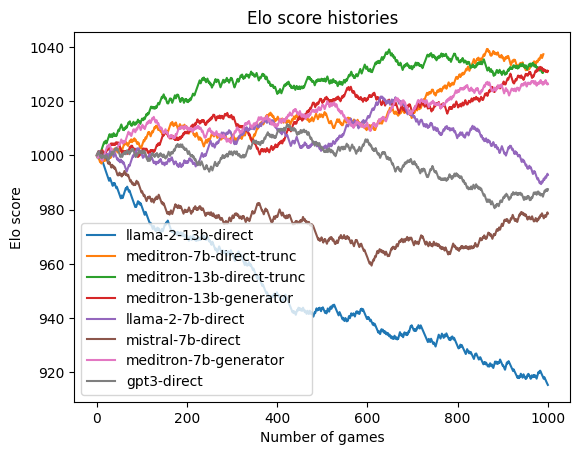

In [48]:
for score_historie in elo_rankings['score_histories']:
    plt.plot(score_historie)

plt.xlabel('Number of games')
plt.ylabel('Elo score')
plt.title('Elo score histories')
plt.legend(elo_rankings['model'])
plt.show()